## Установка параметров

---



Математическое пояснение:
Здесь задаются параметры для двух распределений:
- Биномиальное распределение: $B(n, p)$, где $n$ — число испытаний, $p$ — вероятность успеха, $N$ — размер выборки.
- Геометрическое распределение: $Geom(p)$, где $p$ — вероятность успеха в каждом испытании до первого успеха.

Параметры:
- $N = 150$ — объем выборки.
- Для $B(n, p)$: $n = 10$, $p_{\text{binom}} = 0.5$.
- Для $Geom(p)$: $p_{\text{geom}} = 0.3$.


Простыми словами:
 Биномиальное — это как подбрасывание монетки 10 раз, а геометрическое — сколько раз бросить кубик, чтобы выпала шестерка.

In [ ]:
# Установка параметров
N <- 150
# Биномиальное распределение
n <- 10
p_binom <- 0.5
# Геометрическое распределение
p_geom <- 0.3

# Генерация выборок
set.seed(123) # Для воспроизводимости
binom_sample <- rbinom(N, n, p_binom)
geom_sample <- rgeom(N, p_geom) + 1 # +1, т.к. в R rgeom считает попытки до успеха, начиная с 0

## Построение полигонов частот

Математическое пояснение:
Полигон частот строится как график относительных частот $\frac{n_i}{N}$, где $n_i$ — число появлений значения $x_i$ в выборке, $N$ — объем выборки. Для каждого уникального значения $x_i$ вычисляется $\frac{n_i}{N}$, и точки соединяются линиями.

Простыми словами:
Этот блок рисует графики, показывающие, как часто встречаются разные значения в данных. Это как гистограмма, но с точками и линиями — видно, какие числа популярны, а какие нет.

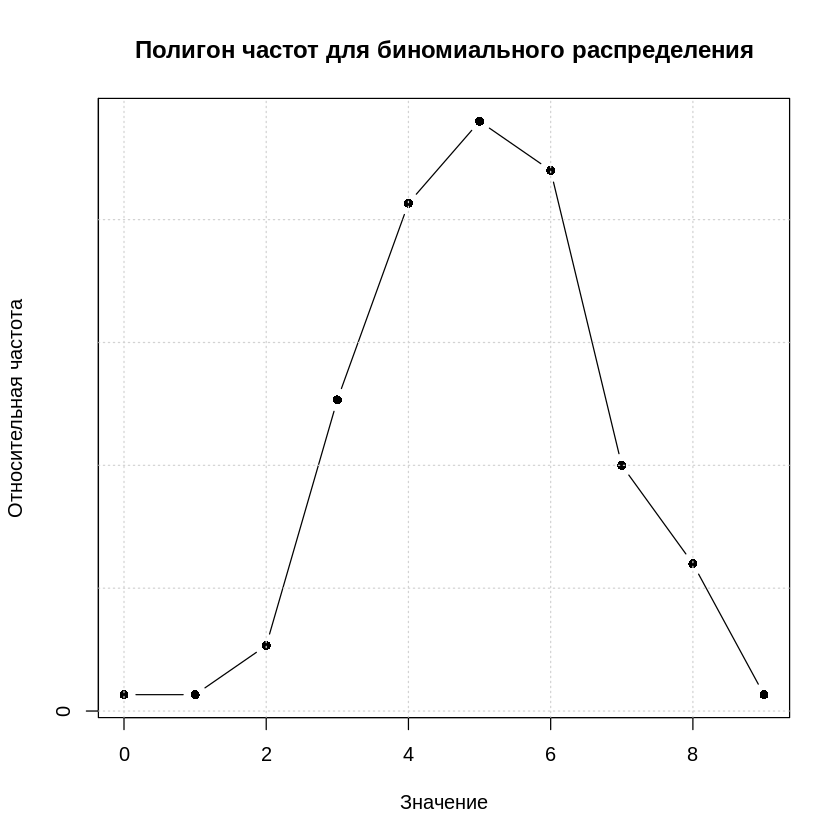

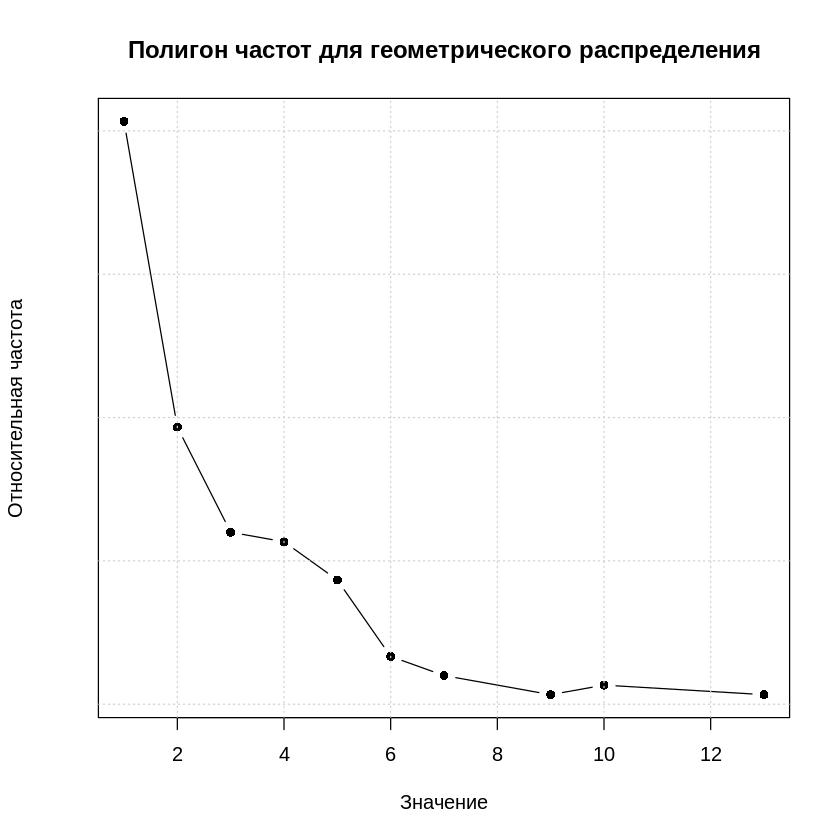

In [ ]:
# Функция для построения полигона частот
plot_frequency_polygon <- function(sample, title) {
  freq_table <- table(sample) / N
  plot(as.numeric(names(freq_table)), freq_table, type = "b", pch = 16,
       xlab = "Значение", ylab = "Относительная частота", main = title)
  grid()
}

# Построение полигонов частот
plot_frequency_polygon(binom_sample, "Полигон частот для биномиального распределения")
plot_frequency_polygon(geom_sample, "Полигон частот для геометрического распределения")

## Построение эмпирической функции распределения

Математическое пояснение:
ЭФР определяется как $F_n(x) = \frac{\text{число элементов } \leq x}{N}$. Это ступенчатая функция, которая показывает долю значений выборки, меньших или равных $x$, при увеличении $x$.

Простыми словами:
Этот блок строит графики, показывающие, как накапливается доля данных по мере роста значений. Похоже на лестницу: каждый шаг — новое значение из выборки.

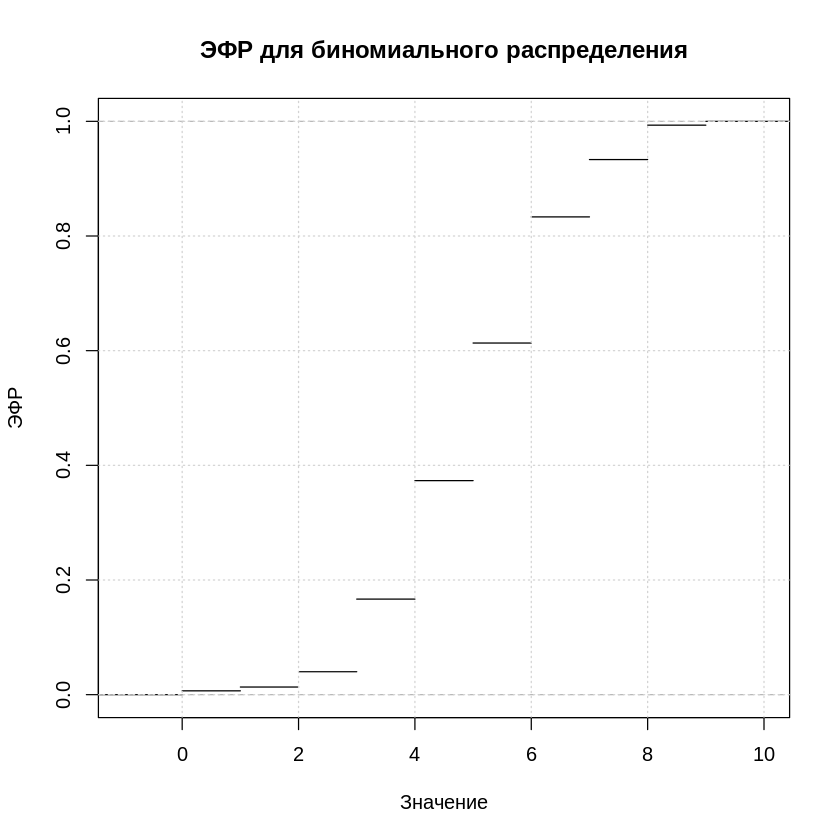

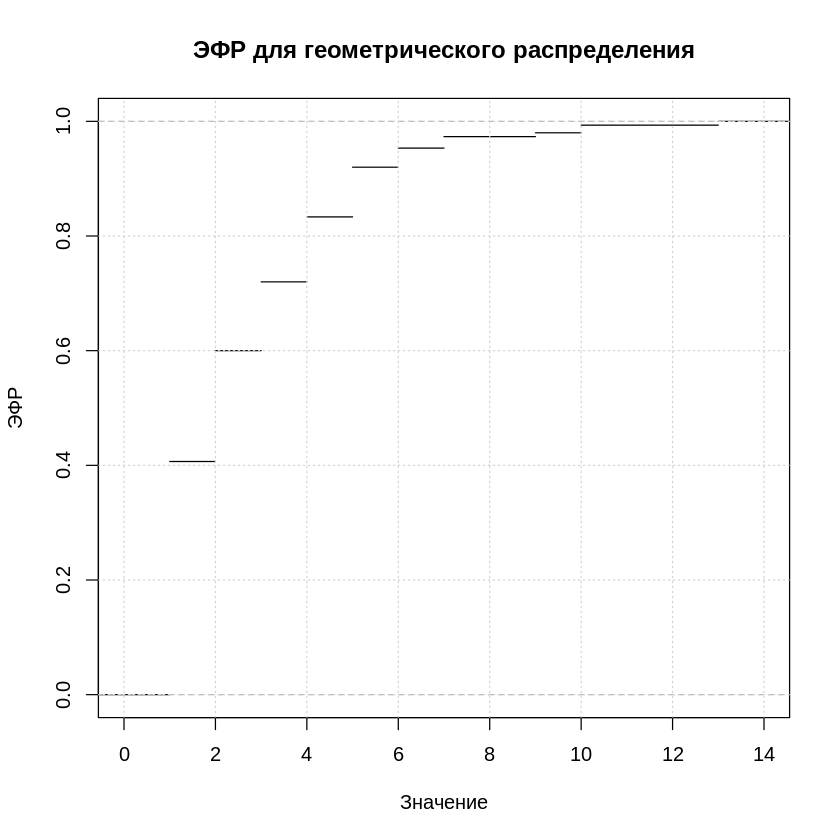

In [ ]:
# Функция для построения ЭФР
plot_ecdf <- function(sample, title) {
  plot(ecdf(sample), main = title, xlab = "Значение", ylab = "ЭФР", do.points = FALSE)
  grid()
}

# Построение ЭФР
plot_ecdf(binom_sample, "ЭФР для биномиального распределения")
plot_ecdf(geom_sample, "ЭФР для геометрического распределения")

## Оценка числовых характеристик выборок

Математическое пояснение:
Вычисляются выборочные статистики:
- Среднее: $\bar{x} = \frac{1}{N} \sum_{i=1}^N x_i$.
- Дисперсия: $s^2 = \frac{1}{N-1} \sum_{i=1}^N (x_i - \bar{x})^2$.
- СКО: $s = \sqrt{s^2}$.
- Мода: наиболее частое значение.
- Медиана: срединное значение упорядоченной выборки.
- Асимметрия: $\text{Skew} = \frac{\frac{1}{N} \sum (x_i - \bar{x})^3}{s^3}$.
- Эксцесс: $\text{Kurt} = \frac{\frac{1}{N} \sum (x_i - \bar{x})^4}{s^4} - 3$.

Простыми словами:
Здесь мы считаем основные характеристики данных: среднее (типичное значение), разброс (насколько данные разные), моду (самое популярное число), медиану (середину), а также проверяем, насколько данные "кривые" или "острые".

In [ ]:
# Функция для вычисления статистик
calculate_statistics <- function(sample) {
  mean_val <- mean(sample)
  var_val <- var(sample) # В R по умолчанию выборочная дисперсия
  std_val <- sd(sample)  # СКО
  mode_val <- as.numeric(names(sort(table(sample), decreasing = TRUE)[1])) # Мода
  median_val <- median(sample)
  skewness <- mean((sample - mean_val)^3) / std_val^3 # Асимметрия
  kurtosis <- mean((sample - mean_val)^4) / std_val^4 - 3 # Эксцесс
  return(c(mean_val, var_val, std_val, mode_val, median_val, skewness, kurtosis))
}

# Вычисление статистик
binom_stats <- calculate_statistics(binom_sample)
geom_stats <- calculate_statistics(geom_sample)

# Вывод результатов
cat("Биномиальное распределение:\n")
cat(sprintf("Среднее: %.4f, Дисперсия: %.4f, СКО: %.4f, Мода: %.0f, Медиана: %.4f, Асимметрия: %.4f, Эксцесс: %.4f\n",
            binom_stats[1], binom_stats[2], binom_stats[3], binom_stats[4], binom_stats[5], binom_stats[6], binom_stats[7]))

cat("Геометрическое распределение:\n")
cat(sprintf("Среднее: %.4f, Дисперсия: %.4f, СКО: %.4f, Мода: %.0f, Медиана: %.4f, Асимметрия: %.4f, Эксцесс: %.4f\n",
            geom_stats[1], geom_stats[2], geom_stats[3], geom_stats[4], geom_stats[5], geom_stats[6], geom_stats[7]))

Биномиальное распределение:
Среднее: 5.0267, Дисперсия: 2.5094, СКО: 1.5841, Мода: 5, Медиана: 5.0000, Асимметрия: -0.0837, Эксцесс: -0.0337
Геометрическое распределение:
Среднее: 2.6600, Дисперсия: 4.3736, СКО: 2.0913, Мода: 1, Медиана: 2.0000, Асимметрия: 1.8248, Эксцесс: 4.4766


##Теоретические характеристики и сравнение

Математическое пояснение:
Теоретические характеристики:
- Биномиальное: $M = n \cdot p$, $D = n \cdot p \cdot (1 - p)$.
- Геометрическое: $M = \frac{1}{p}$, $D = \frac{1 - p}{p^2}$.

Сравнение: $\Delta M = \bar{x} - M$, $\Delta D = s^2 - D$.

Простыми словами:
Тут мы считаем "правильные" среднее и разброс по формулам и сравниваем их с тем, что получилось из данных. Это проверка, насколько наши случайные числа близки к теории.

In [ ]:
# Теоретические характеристики
binom_mean_theor <- n * p_binom
binom_var_theor <- n * p_binom * (1 - p_binom)
geom_mean_theor <- 1 / p_geom
geom_var_theor <- (1 - p_geom) / p_geom^2

# Вывод теоретических характеристик и сравнение
cat("\nТеоретические характеристики:\n")
cat(sprintf("Биномиальное: M = %.4f, D = %.4f\n", binom_mean_theor, binom_var_theor))
cat(sprintf("Геометрическое: M = %.4f, D = %.4f\n", geom_mean_theor, geom_var_theor))

cat("Сравнение (оценка - теория):\n")
cat(sprintf("Биномиальное: Среднее: %.4f, Дисперсия: %.4f\n",
            binom_stats[1] - binom_mean_theor, binom_stats[2] - binom_var_theor))
cat(sprintf("Геометрическое: Среднее: %.4f, Дисперсия: %.4f\n",
            geom_stats[1] - geom_mean_theor, geom_stats[2] - geom_var_theor))


Теоретические характеристики:
Биномиальное: M = 5.0000, D = 2.5000
Геометрическое: M = 3.3333, D = 7.7778
Сравнение (оценка - теория):
Биномиальное: Среднее: 0.0267, Дисперсия: 0.0094
Геометрическое: Среднее: -0.6733, Дисперсия: -3.4042


## Оценка параметров распределений

Математическое пояснение:
Оценки параметров методом моментов:
- Для $B(n, p)$: $\hat{p} = \frac{\bar{x}}{n}$.
- Для $Geom(p)$: $\hat{p} = \frac{1}{\bar{x}}$.

Простыми словами:
Мы угадываем вероятности успеха для наших распределений, основываясь на среднем значении выборки, и сравниваем с тем, что задали изначально.

In [ ]:
# Оценка параметров
p_binom_est <- binom_stats[1] / n
p_geom_est <- 1 / (geom_stats[1] + 1)

# Вывод оценок параметров
cat("\nОценки параметров:\n")
cat(sprintf("Биномиальное: p` = %.4f (теоретическое p = %.4f)\n", p_binom_est, p_binom))
cat(sprintf("Геометрическое: p` = %.4f (теоретическое p = %.4f)\n", p_geom_est, p_geom))


Оценки параметров:
Биномиальное: p` = 0.5027 (теоретическое p = 0.5000)
Геометрическое: p` = 0.2732 (теоретическое p = 0.3000)


## Критерий Хи2 для проверки соответствия

Математическое пояснение:
Критерий $\chi^2$ проверяет соответствие выборки теоретическому распределению:
- $\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}$, где $O_i$ — наблюдаемые частоты, $E_i$ — ожидаемые частоты.
- Степени свободы: $df = k - 1 - m$, где $k$ — число категорий, $m$ — число оцениваемых параметров (здесь $m = 1$).
- $p$-значение: $P(\chi^2 > \chi^2_{\text{набл}})$.

Простыми словами:
Этот блок проверяет, похожи ли наши данные на "идеальные" биномиальное или геометрическое распределение. Если $p$-значение большое, то все нормально, если маленькое — что-то не так.

In [ ]:
# Критерий Хи2 для биномиального распределения
binom_table <- table(binom_sample)
expected_binom <- dbinom(as.numeric(names(binom_table)), n, p_binom) * N
chi2_binom <- sum((binom_table - expected_binom)^2 / expected_binom)
df_binom <- length(binom_table) - 1 - 1 # -1 для параметра p
p_value_binom <- 1 - pchisq(chi2_binom, df_binom)

# Критерий Хи2 для геометрического распределения
geom_table <- table(geom_sample)
expected_geom <- dgeom(as.numeric(names(geom_table)) - 1, p_geom) * N # -1, т.к. rgeom начинается с 0
chi2_geom <- sum((geom_table - expected_geom)^2 / expected_geom)
df_geom <- length(geom_table) - 1 - 1 # -1 для параметра p
p_value_geom <- 1 - pchisq(chi2_geom, df_geom)

# Вывод результатов
cat(sprintf("\nКритерий Хи2 для биномиального: Хи2 = %.4f, p-value = %.4f\n", chi2_binom, p_value_binom))
cat(sprintf("Критерий Хи2 для геометрического: Хи2 = %.4f, p-value = %.4f\n", chi2_geom, p_value_geom))


Критерий Хи2 для биномиального: Хи2 = 7.8475, p-value = 0.4485
Критерий Хи2 для геометрического: Хи2 = 10.3255, p-value = 0.2429
